### R. Firdaus Dharmawan Akbar
##### https://github.com/rfdharma
##### https://www.linkedin.com/in/firdausdharmaa/

In [546]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [547]:
df = pd.read_csv('Boston_House_Price - Boston_House_Price.csv')

df1 = df
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Understanding

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [549]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [550]:
pd.DataFrame(df.statezip.value_counts()).head()

,statezip
WA 98103,148
WA 98052,135
WA 98117,132
WA 98115,130
WA 98006,110


In [551]:
pd.DataFrame(df.city.value_counts()).head()

,city
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Issaquah,187


In [552]:
print(f'Jumlah Street : {df.street.count()}')
print('Value Counts :')
print(df.street.value_counts())

Jumlah Street : 4600
Value Counts :
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64


# Data Preprocessing

In [553]:
df = df.drop(columns=['country','date','street'])

In [554]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64

#### Data Transformasi

In [555]:
label_encoder = LabelEncoder()
for col in df:
    if df[col].dtypes.name == 'object':
        df[col]= label_encoder.fit_transform(df[col])

In [556]:
df[df['yr_renovated'] > 0] = 1 

#### Handling Outlier

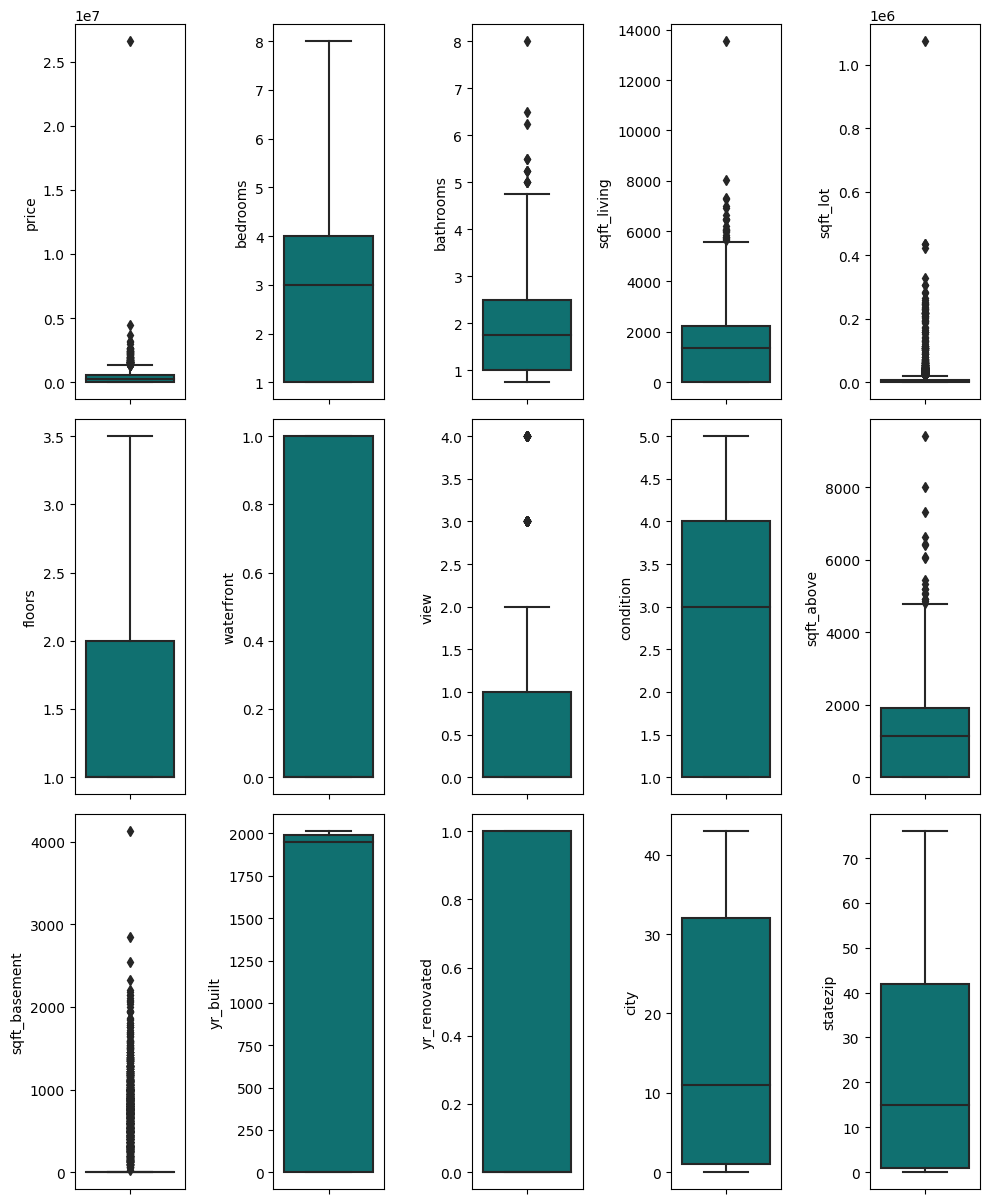

In [557]:
plt.figure(figsize=(10,20))


# plotting
feat_num = list(df)
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

In [558]:
df['price'] = np.log10(df['price'] + 1)

In [559]:
def impute_outliers_median(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung batas atas dan batas bawah untuk setiap atribut
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Mengisi nilai outlier dengan rata-rata nilai pada atribut tersebut
    new_df = df.copy()
    for col in new_df.columns:
        col_median = new_df[col].median()
        mask = (new_df[col] < lower_bound[col]) | (new_df[col] > upper_bound[col])
        new_df.loc[mask, col] = col_median
    
    return new_df

df = impute_outliers_median(df) 

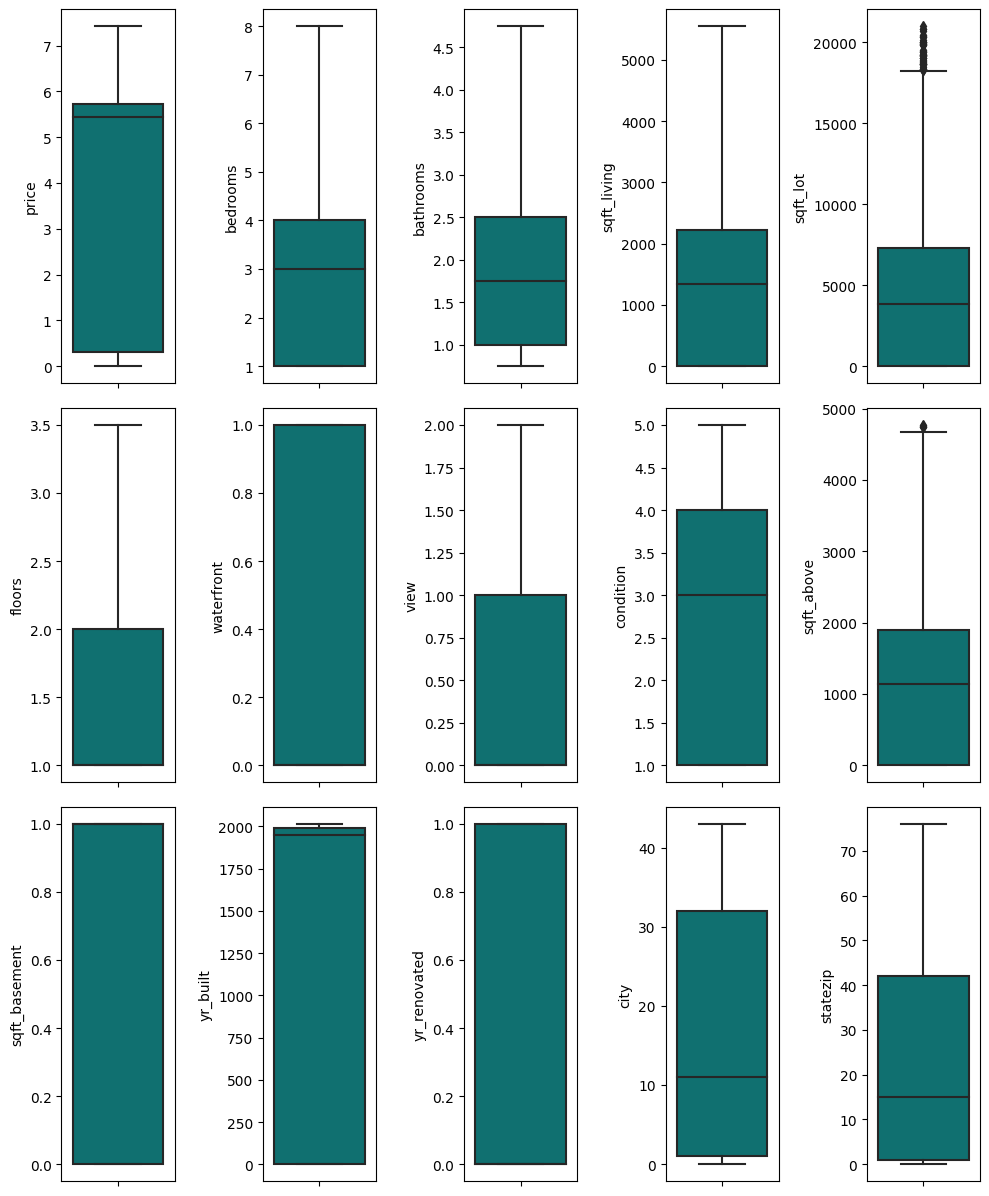

In [560]:
plt.figure(figsize=(10,20))


# plotting
feat_num = list(df)
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

#### Data Rescaling

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380\1409571863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380\1409571863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380

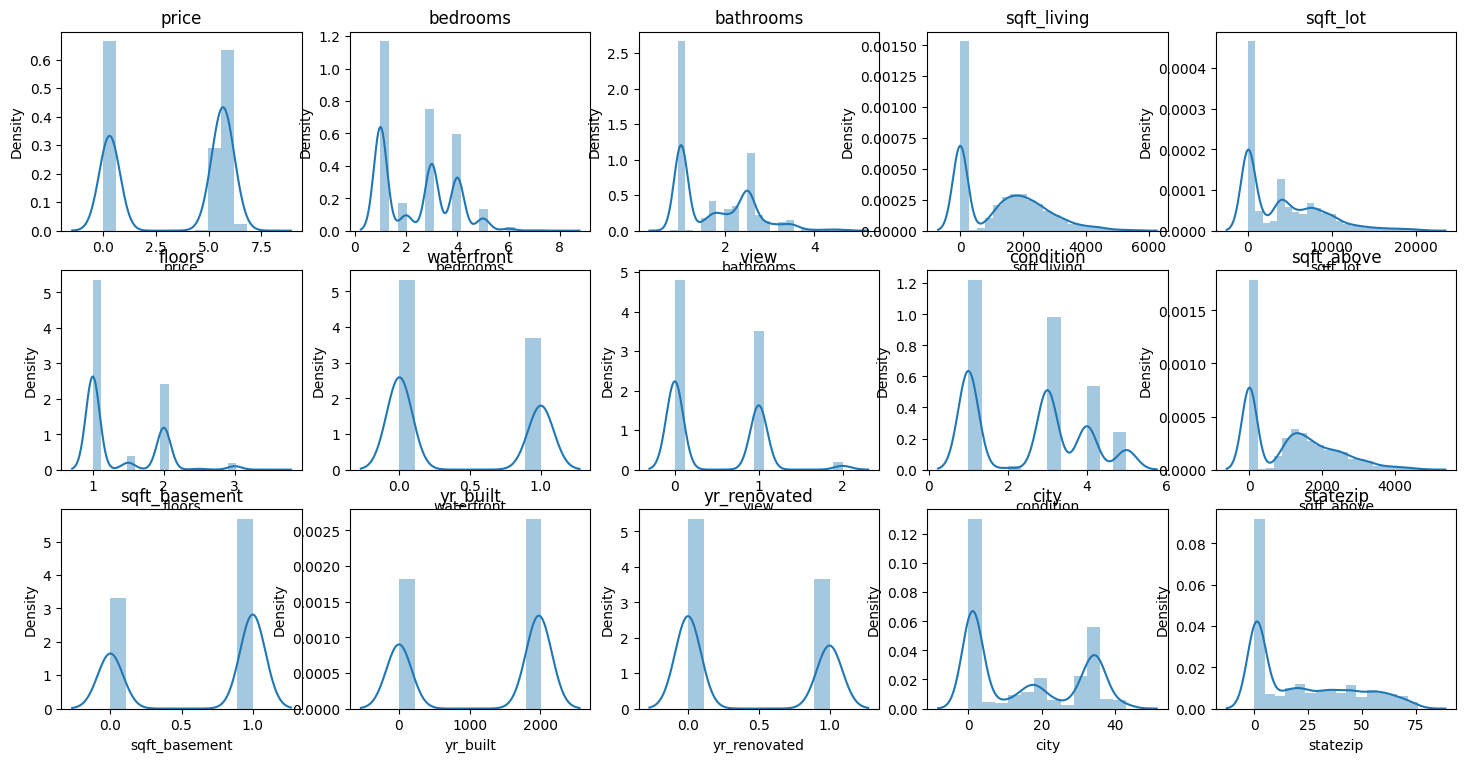

In [561]:
plt.figure(figsize=(18,15))
features = df.columns
for i,var in enumerate(features):
    plt.subplot(5,5,i+1)
    sns.distplot(df[var])
    plt.title(var)

In [562]:
df.skew()

price           -0.345224
bedrooms         0.320479
bathrooms        0.712979
sqft_living      0.529725
sqft_lot         1.010427
floors           1.088905
waterfront       0.368840
view             0.607645
condition        0.158793
sqft_above       0.631421
sqft_basement   -0.542564
yr_built        -0.383810
yr_renovated     0.385339
city             0.357548
statezip         0.688492
dtype: float64

In [563]:
colnames = df.columns
pt = PowerTransformer(method='yeo-johnson')
# pt = StandardScaler()
num_df_transform = pd.DataFrame(pt.fit_transform(df))
num_df_transform.columns = colnames

df = num_df_transform

In [564]:
df.skew()

price           -0.350604
bedrooms        -0.005477
bathrooms        0.163521
sqft_living     -0.323388
sqft_lot        -0.284831
floors           0.610758
waterfront       0.368840
view             0.287959
condition       -0.060779
sqft_above      -0.314759
sqft_basement   -0.542564
yr_built        -0.385246
yr_renovated     0.385339
city            -0.010826
statezip        -0.013551
dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380\1409571863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380\1409571863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26380

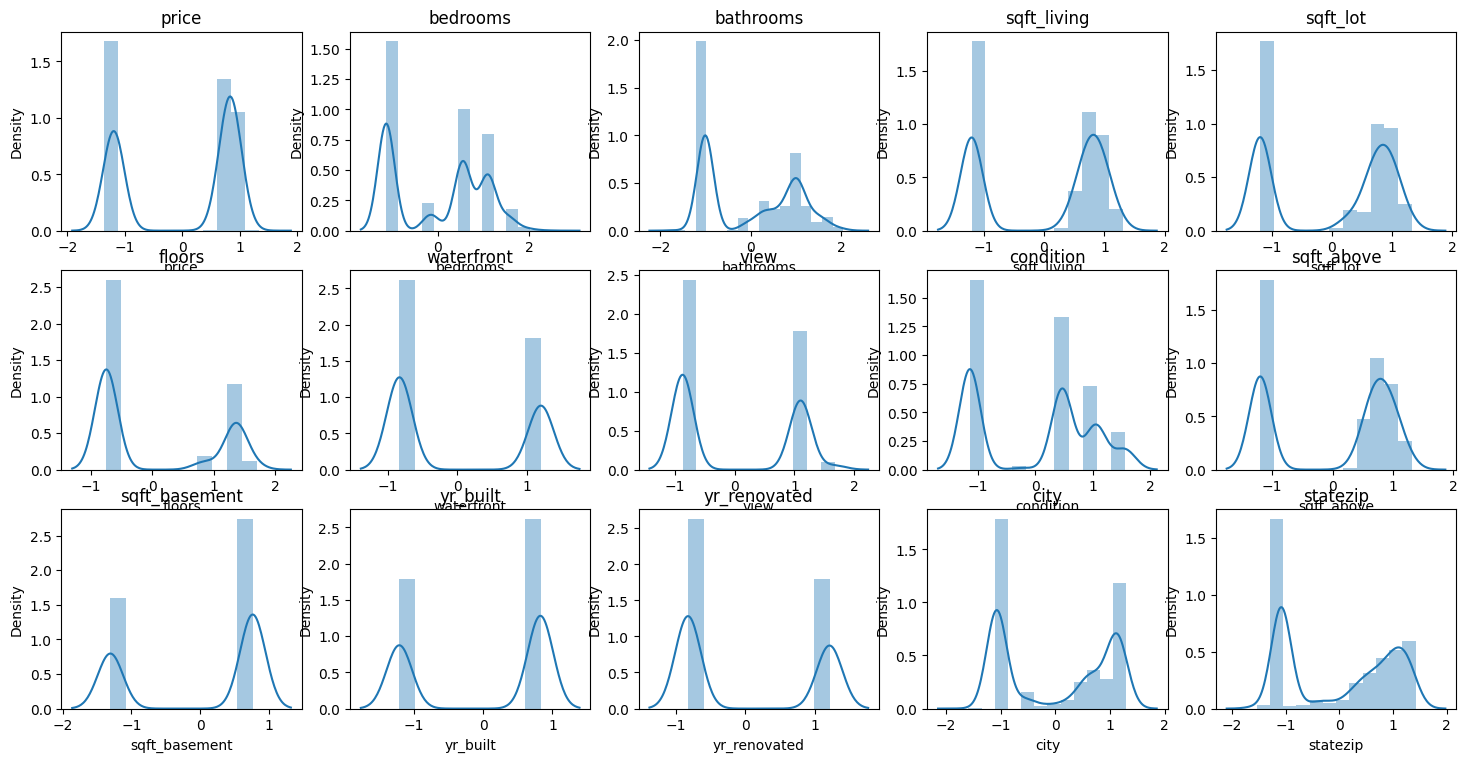

In [565]:
plt.figure(figsize=(18,15))
features = df.columns
for i,var in enumerate(features):
    plt.subplot(5,5,i+1)
    sns.distplot(df[var])
    plt.title(var)

In [583]:
# # Select numerical features
# num_features = df.select_dtypes(include=[np.number]).columns.tolist()

# # Compute VIF scores for each feature
# vif_scores = pd.DataFrame()
# vif_scores["feature"] = num_features
# vif_scores["VIF"] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

# # Print VIF scores
# print(vif_scores)

# # # Drop features with high VIF
# # threshold = 5
# # high_vif_features = vif_scores[vif_scores["VIF"] > threshold]["feature"]
# # df = df.drop(high_vif_features, axis=1)

          feature           VIF
0           price     31.720915
1        bedrooms     12.332608
2       bathrooms      9.250999
3     sqft_living    388.084165
4        sqft_lot     48.798839
5          floors      3.720267
6      waterfront     63.983893
7            view      6.225200
8       condition     15.359304
9      sqft_above    384.672883
10  sqft_basement      4.294505
11       yr_built  69953.480815
12   yr_renovated  71198.460255
13           city      9.958625
14       statezip     11.253424


# Exploratory Data Analysis

In [567]:
df.groupby('statezip')['price'].mean()

statezip
-1.540784    0.690211
-1.081970   -1.163534
-0.811256    0.766668
-0.618132    0.818850
-0.467731    0.899666
               ...   
 1.381139    0.599281
 1.390722    0.773116
 1.400178    0.878512
 1.409511    0.747927
 1.418724    0.764892
Name: price, Length: 76, dtype: float64

In [568]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03
mean,1.428809e-17,8.032222e-17,-1.155404e-15,-9.113483e-17,-2.162521e-17,4.664868e-15,2.471453e-17,3.861645e-17,-6.719263e-17,3.707179e-17,1.390192e-16,5.638002e-17,4.942906e-17,4.093344e-17,-2.440560e-16
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-1.359505e+00,-1.121131e+00,-1.687250e+00,-1.198505e+00,-1.189631e+00,-7.492360e-01,-8.324925e-01,-8.745260e-01,-1.144764e+00,-1.196936e+00,-1.307314e+00,-1.210968e+00,-8.257731e-01,-1.589964e+00,-1.540784e+00
25%,-1.190891e+00,-1.121131e+00,-1.006866e+00,-1.198505e+00,-1.189631e+00,-7.492360e-01,-8.324925e-01,-8.745260e-01,-1.144764e+00,-1.196936e+00,-1.307314e+00,-1.210968e+00,-8.257731e-01,-1.071594e+00,-1.081970e+00
50%,7.642707e-01,5.532598e-01,2.825163e-01,6.305434e-01,6.503132e-01,-7.492360e-01,-8.324925e-01,-8.745260e-01,4.677320e-01,6.148646e-01,7.649273e-01,8.180296e-01,-8.257731e-01,2.909759e-01,3.248379e-01
75%,8.471760e-01,1.098447e+00,1.012313e+00,8.563260e-01,8.925205e-01,1.360267e+00,1.201212e+00,1.103174e+00,1.054808e+00,8.470099e-01,7.649273e-01,8.289086e-01,1.210986e+00,1.074887e+00,1.009958e+00
max,1.335817e+00,2.549060e+00,2.047055e+00,1.311130e+00,1.329080e+00,1.703500e+00,1.201212e+00,1.680129e+00,1.561596e+00,1.313123e+00,7.649273e-01,8.346476e-01,1.210986e+00,1.299773e+00,1.418724e+00


In [569]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
price,1.000000,0.913647,0.830715,0.976511,0.964584,0.624081,-0.977434,-0.892778,0.927521,0.975563,-0.617312,0.983428,-0.983406,0.874743,0.881675
bedrooms,0.913647,1.000000,0.875051,0.949084,0.930804,0.624117,-0.919290,-0.837101,0.880013,0.943973,-0.546440,0.926034,-0.925800,0.800462,0.805643
bathrooms,0.830715,0.875051,1.000000,0.877396,0.817859,0.719626,-0.823876,-0.742136,0.749457,0.874289,-0.464882,0.832943,-0.831443,0.729806,0.722742
sqft_living,0.976511,0.949084,0.877396,1.000000,0.979496,0.649853,-0.980771,-0.892850,0.931259,0.996318,-0.606530,0.989884,-0.989693,0.870875,0.876921
sqft_lot,0.964584,0.930804,0.817859,0.979496,1.000000,0.561146,-0.972859,-0.888724,0.941136,0.977557,-0.625145,0.982195,-0.982365,0.847573,0.853295
floors,0.624081,0.624117,0.719626,0.649853,0.561146,1.000000,-0.612393,-0.562817,0.486013,0.675446,-0.564866,0.620566,-0.618699,0.589374,0.582774
waterfront,-0.977434,-0.919290,-0.823876,-0.980771,-0.972859,-0.612393,1.000000,0.904904,-0.937220,-0.979471,0.629467,-0.991931,0.991929,-0.877787,-0.884938
view,-0.892778,-0.837101,-0.742136,-0.892850,-0.888724,-0.562817,0.904904,1.000000,-0.851739,-0.894795,0.621913,-0.911099,0.910971,-0.806188,-0.815064
condition,0.927521,0.880013,0.749457,0.931259,0.941136,0.486013,-0.937220,-0.851739,1.000000,0.922220,-0.540598,0.944264,-0.945315,0.832114,0.844634
sqft_above,0.975563,0.943973,0.874289,0.996318,0.977557,0.675446,-0.979471,-0.894795,0.922220,1.000000,-0.655864,0.988716,-0.988397,0.868469,0.873035


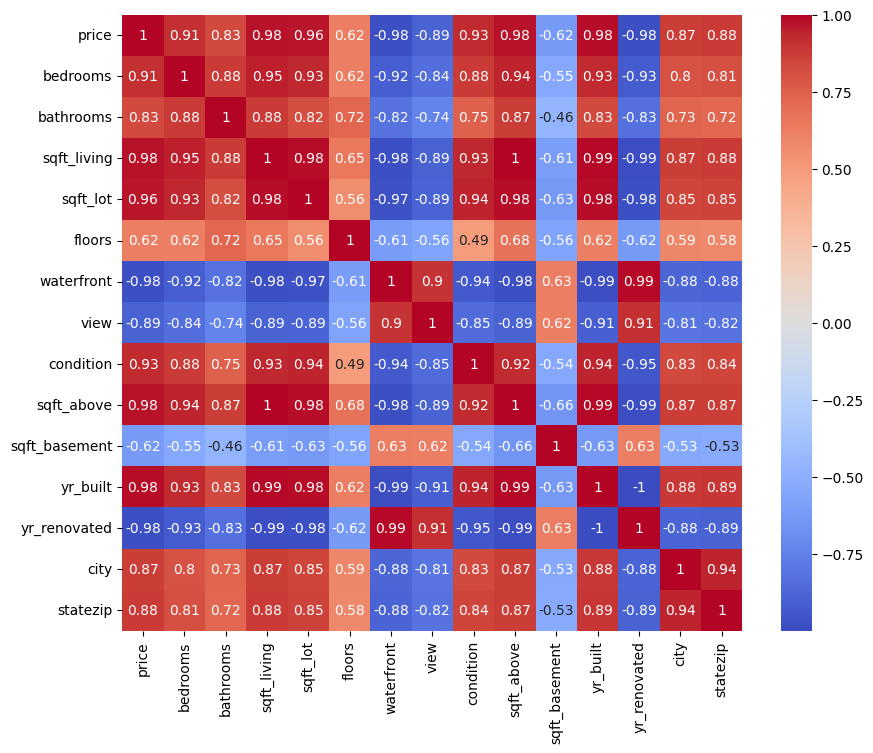

In [570]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

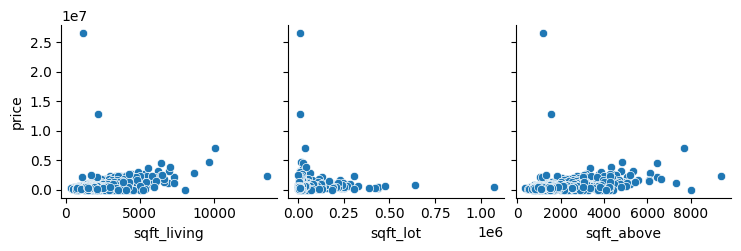

In [571]:
sns.pairplot(data=df1, x_vars=['sqft_living','sqft_lot','sqft_above'], y_vars=["price"])

Text(0, 0.5, 'Value Count')

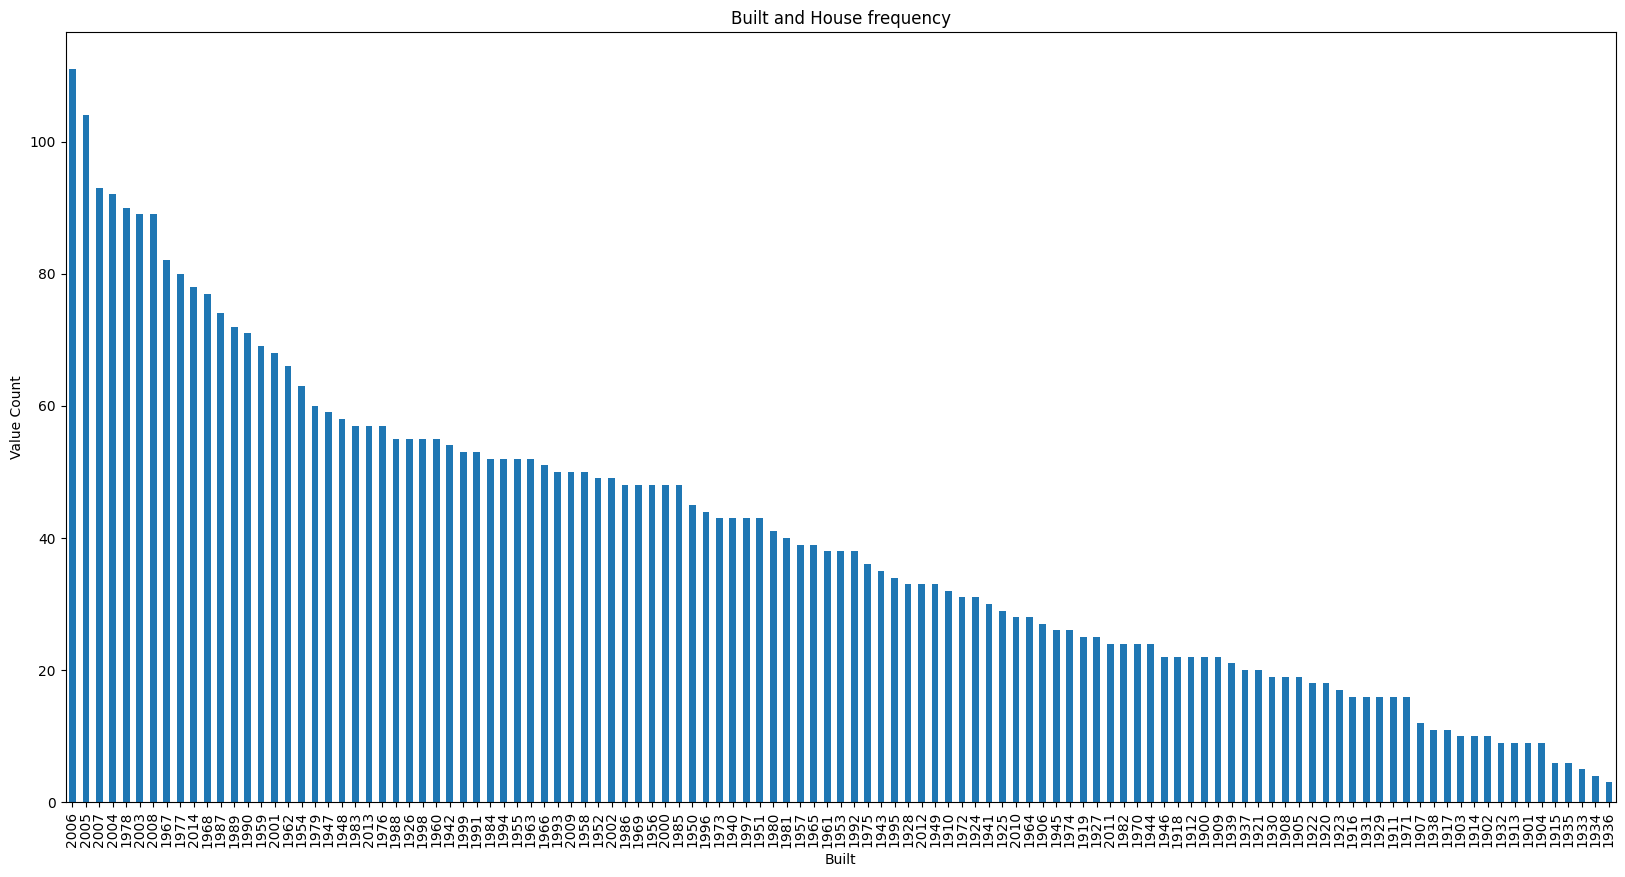

In [572]:
plt.figure(figsize=(20,10))
df1['yr_built'].value_counts().plot(kind='bar')
plt.title('Built and House frequency')
plt.xlabel('Built')
plt.ylabel('Value Count')

Text(0, 0.5, 'Count')

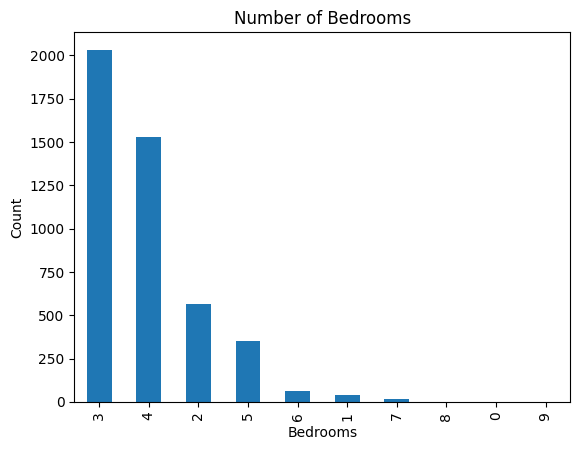

In [573]:
df1['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

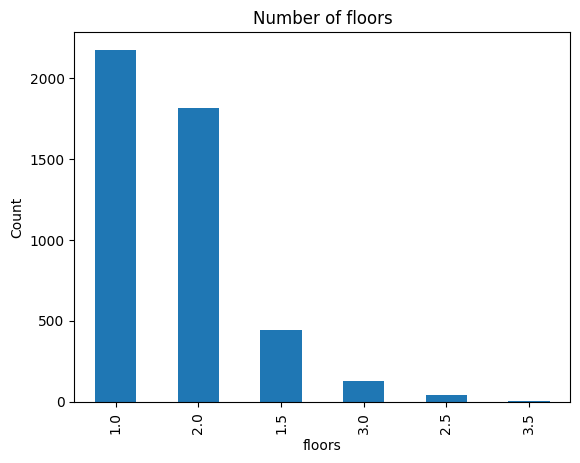

In [574]:
df1['floors'].value_counts().plot(kind='bar')
plt.title('Number of floors')
plt.xlabel('floors')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

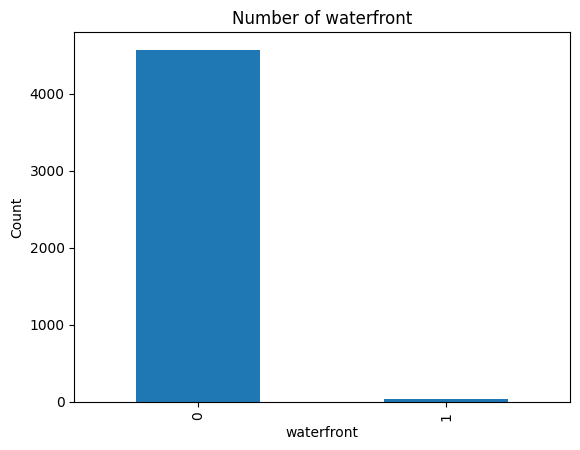

In [575]:
df1['waterfront'].value_counts().plot(kind='bar')
plt.title('Number of waterfront')
plt.xlabel('waterfront')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

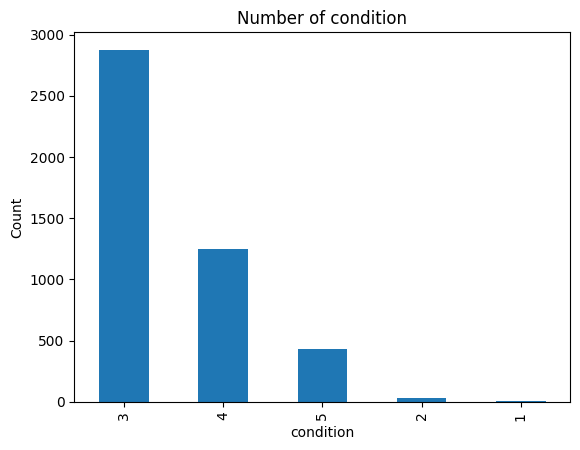

In [576]:
df1['condition'].value_counts().plot(kind='bar')
plt.title('Number of condition')
plt.xlabel('condition')
plt.ylabel('Count')

# Data Modeling

In [577]:
x = df.drop(columns=['price'])
y = df.price

In [578]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=123)

In [579]:
# Inisialisasi model
model = LinearRegression()

# Latih model
model.fit(xtrain, ytrain)

LinearRegression()

#### Evaluasi Model

In [580]:
# Menampilkan koefisien dari setiap fitur pada model
coefficients = pd.DataFrame(model.coef_, x.columns)
coefficients.columns = ['Slope']
print(coefficients)


                  Slope
bedrooms      -0.038722
bathrooms      0.028511
sqft_living   -0.007262
sqft_lot      -0.026677
floors         0.007253
waterfront    -0.181513
view           0.024360
condition      0.004136
sqft_above     0.191413
sqft_basement  0.011293
yr_built      -1.652233
yr_renovated  -2.311981
city           0.006335
statezip       0.015223


In [581]:
# Menampilkan slope dan intercept
print("Intercept:", model.intercept_)

Intercept: -0.0019969782186210045


In [582]:
# Menghitung hasil prediksi pada dataset pengujian
y_pred = model.predict(xtest)

# Menghitung metrik evaluasi
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

# Mencetak hasil evaluasi
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.023557457995490312
Mean Absolute Error: 0.037807679456466584
R-squared: 0.9763976217655786
